<a href="https://colab.research.google.com/github/iamtatha/Data_Science/blob/master/stock_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def price(df):
  # importing needed libraries
  import math
  import pandas_datareader as web
  import numpy as np
  import pandas as pd
  from sklearn.preprocessing import MinMaxScaler
  from keras.models import Sequential
  from keras.layers import  LSTM
  from keras.layers import Dense
  import matplotlib.pyplot as plt
  plt.style.use('dark_background')

  df=df.dropna()

  # modify the data
  data = df.filter(['Close'])
  dataset = data.values
  training_data_len = math.ceil(len(dataset)*0.8)
  print(training_data_len)
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(dataset)
  scaled_data
  train_data = scaled_data[0:training_data_len, : ]
  x_train = []
  y_train = []

  input_days = 75
  pred_day = 0

  for i in range( 1000+ input_days ,len(train_data) - pred_day):
    x_train.append(train_data[ i - input_days : i , 0 ])
    y_train.append(train_data[ i + pred_day , 0 ])

  x_train = np.array(x_train)
  y_train = np.array(y_train)
  x_train = np.reshape(x_train , ( x_train.shape[0] , x_train.shape[1] , 1 ))

  from keras.layers.advanced_activations import LeakyReLU
  model = Sequential()
  model.add( LSTM( 70, return_sequences = True, input_shape=(x_train.shape[1], 1 )) )
  model.add( LSTM( 70, return_sequences = False ) )
  model.add( Dense(30) )
  model.add( Dense(1) )
  #model.add(Dense(800,input_shape=(num_inputs,)))
  #model.add(LeakyReLU(alpha=0.1))
  model.compile(  loss='mean_squared_error', optimizer='adam' )
  model.fit(x_train, y_train, batch_size=1, epochs=1)

  test_data = scaled_data[training_data_len - input_days: , :]
  x_test =[]
  y_test = dataset[training_data_len: , :]
  for i in range( input_days , len(test_data)):
    x_test.append(test_data[i - input_days :i, 0])
  x_test = np.array(x_test)
  x_test =np.reshape( x_test , ( x_test.shape[0], x_test.shape[1] ,1 ))

  days = int(input())

  predicted = []

  for i in range(days-len(dataset)):
    x = dataset[-input_days+i , :]
    if i>0:
      x.append(pred)
    pred = model.predict(x)
    #pred = scaler.inverse_transform(pred)
    predicted.append(pred)

  print(predicted)


In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd 
df = pd.read_csv('gdrive/My Drive/Stocks/TCS/TCS.csv')

In [3]:
# importing needed libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import  LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
plt.style.use('dark_background')

df=df.dropna()

# modify the data
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
print(training_data_len)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data
train_data = scaled_data[0:training_data_len, : ]
x_train = []
y_train = []

input_days = 75
pred_day = 0

for i in range( 1000+ input_days ,len(train_data) - pred_day):
  x_train.append(train_data[ i - input_days : i , 0 ])
  y_train.append(train_data[ i + pred_day , 0 ])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train , ( x_train.shape[0] , x_train.shape[1] , 1 ))

from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add( LSTM( 70, return_sequences = True, input_shape=(x_train.shape[1], 1 )) )
model.add( LSTM( 70, return_sequences = False ) )
model.add( Dense(30) )
model.add( Dense(1) )
#model.add(Dense(800,input_shape=(num_inputs,)))
#model.add(LeakyReLU(alpha=0.1))
model.compile(  loss='mean_squared_error', optimizer='adam' )
model.fit(x_train, y_train, batch_size=1, epochs=2)

test_data = scaled_data[training_data_len - input_days: , :]
x_test =[]
y_test = dataset[training_data_len: , :]
for i in range( input_days , len(test_data)):
  x_test.append(test_data[i - input_days :i, 0])
x_test = np.array(x_test)
x_test =np.reshape( x_test , ( x_test.shape[0], x_test.shape[1] ,1 ))



/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


3108
Epoch 1/2
2033/2033 [==============================] - 107s 53ms/step - loss: 6.4260e-04
Epoch 2/2
2033/2033 [==============================] - 105s 52ms/step - loss: 2.4899e-04


In [0]:
#days = int(input())
days = 3894
predicted = []
print(dataset[-input_days: , :])

for i in range(days-len(dataset)):
  x = dataset[-input_days+i: , :]
  #print(len(x))
  #print(x)
  if i>0:
    #print(len(x))
    x = list(x)+predicted
    #x.append(pred[0])
    #print(len(x),pred[0])
  x_test = np.array(x)
  #print(x_test.shape[0])
  x_test =np.reshape( x_test , ( x_test.shape[1], x_test.shape[0] ,1 ))
  #print(x_test.shape)
  pred = model.predict(x_test)
  print(pred)
  #pred = scaler.inverse_transform(pred)
  predicted.append(pred)

print(predicted)


[[2184.199951]
 [2203.25    ]
 [2215.75    ]
 [2196.350098]
 [2156.800049]
 [2115.350098]
 [2156.149902]
 [2123.600098]
 [2105.5     ]
 [2000.150024]
 [2001.300049]
 [2036.199951]
 [2083.199951]
 [2125.050049]
 [2116.449951]
 [1972.349976]
 [1953.699951]
 [1769.849976]
 [1806.300049]
 [1696.400024]
 [1658.      ]
 [1654.400024]
 [1636.349976]
 [1797.449951]
 [1669.699951]
 [1703.150024]
 [1750.300049]
 [1790.949951]
 [1824.5     ]
 [1778.5     ]
 [1826.099976]
 [1708.75    ]
 [1654.199951]
 [1775.199951]
 [1705.449951]
 [1766.150024]
 [1759.25    ]
 [1735.150024]
 [1716.050049]
 [1806.199951]
 [1818.650024]
 [1737.650024]
 [1769.5     ]
 [1878.25    ]
 [1818.550049]
 [1836.599976]
 [1859.050049]
 [1905.650024]
 [2014.449951]
 [1930.449951]
 [1932.75    ]
 [1903.599976]
 [1891.650024]
 [1893.400024]
 [1935.300049]
 [1949.5     ]
 [1949.650024]
 [1902.349976]
 [1892.900024]
 [1945.599976]
 [1948.650024]
 [1953.599976]
 [1991.199951]
 [2020.349976]
 [1943.      ]
 [2005.300049]
 [2004.300

In [0]:
pred = scaler.inverse_transform(predicted)

ValueError: ignored

In [0]:
pred = []
for i in predicted:
  pred.append(i[0])

In [0]:
pred

[array([4.8211975], dtype=float32),
 array([4.301313], dtype=float32),
 array([4.066998], dtype=float32),
 array([3.891535], dtype=float32),
 array([3.7648766], dtype=float32),
 array([3.6741605], dtype=float32),
 array([3.610642], dtype=float32),
 array([3.5673661], dtype=float32),
 array([3.534344], dtype=float32),
 array([3.4874744], dtype=float32)]

In [0]:
pred = list(pred)

In [0]:
pred

[array([4.8211975], dtype=float32),
 array([4.301313], dtype=float32),
 array([4.066998], dtype=float32),
 array([3.891535], dtype=float32),
 array([3.7648766], dtype=float32),
 array([3.6741605], dtype=float32),
 array([3.610642], dtype=float32),
 array([3.5673661], dtype=float32),
 array([3.534344], dtype=float32),
 array([3.4874744], dtype=float32)]

In [0]:
type(pred)

list

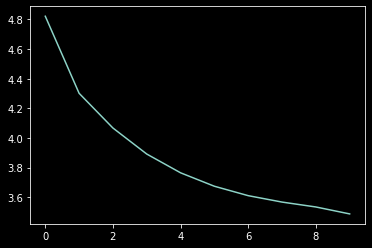

In [0]:
plt.plot(pred)

In [0]:
model.predict(np.reshape(dataset[-input_days+i: , :]),(dataset[-input_days+i: , :]).shape[0], dataset[-input_days+i: , :]).shape[1], 1))

SyntaxError: ignored

In [4]:
scaled_data

array([[0.00551329],
       [0.00499677],
       [0.00405373],
       ...,
       [0.89397159],
       [0.90481907],
       [0.90495758]])

In [45]:
test_data = scaled_data[training_data_len-75:,:]
len(test_data)

851

In [6]:
dataset

array([[ 123.494003],
       [ 122.375   ],
       [ 120.332001],
       ...,
       [2048.25    ],
       [2071.75    ],
       [2072.050049]])

In [0]:
y_test = dataset[training_data_len:,:]

In [0]:
x_test = []
for i in range(75,len(test_data)):
  x_test.append(test_data[i-75:i,0])

In [17]:
x_test

[array([0.48248249, 0.48112075, 0.47659715, 0.47775114, 0.48474426,
        0.48243629, 0.49127585, 0.49447473, 0.49350539, 0.49509325,
        0.49769203, 0.48728304, 0.47505076, 0.48019756, 0.4828887 ,
        0.48497506, 0.48958183, 0.46764219, 0.46977938, 0.47444148,
        0.47821274, 0.47726644, 0.47596477, 0.48088995, 0.48358109,
        0.4915759 , 0.49268374, 0.48693684, 0.46314164, 0.44885523,
        0.45802713, 0.46377864, 0.46567117, 0.46655745, 0.47263663,
        0.48333643, 0.50194793, 0.50570994, 0.50386356, 0.5055853 ,
        0.51344628, 0.50424666, 0.52601089, 0.51750834, 0.50507756,
        0.52130264, 0.52316289, 0.51771142, 0.52078566, 0.52583549,
        0.52413223, 0.51915621, 0.525457  , 0.52831887, 0.53006371,
        0.53525204, 0.54108199, 0.52511081, 0.5303268 , 0.5314485 ,
        0.5208872 , 0.52243353, 0.52064254, 0.51635436, 0.50870107,
        0.50520682, 0.50933345, 0.51271698, 0.51188609, 0.50976276,
        0.50512371, 0.50270957, 0.50243725, 0.50

In [0]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [22]:
print(x_test.shape)
print(y_test.shape)

(776, 75)
(776, 1)


In [23]:
x_test = np.reshape( x_test , (x_test.shape[0] , x_test.shape[1] , 1) )
x_test.shape

(776, 75, 1)

In [0]:
pred = model.predict(x_test)

In [25]:
pred

array([[0.50727695],
       [0.5075087 ],
       [0.50590664],
       [0.5002448 ],
       [0.49428925],
       [0.489607  ],
       [0.4860948 ],
       [0.48562005],
       [0.48524567],
       [0.48610803],
       [0.48598906],
       [0.48551735],
       [0.48452044],
       [0.48177722],
       [0.4803235 ],
       [0.48248097],
       [0.4845011 ],
       [0.4852744 ],
       [0.48675045],
       [0.48850593],
       [0.48850912],
       [0.48902366],
       [0.49014208],
       [0.49133876],
       [0.49614152],
       [0.5020889 ],
       [0.5116008 ],
       [0.51735234],
       [0.52183276],
       [0.5238802 ],
       [0.5269326 ],
       [0.5333893 ],
       [0.5359133 ],
       [0.53638446],
       [0.5348181 ],
       [0.5329866 ],
       [0.5321965 ],
       [0.5327945 ],
       [0.5362114 ],
       [0.5452923 ],
       [0.54814637],
       [0.54274285],
       [0.53587645],
       [0.52944326],
       [0.52297515],
       [0.5197982 ],
       [0.51495856],
       [0.510

In [26]:
type(pred)

numpy.ndarray

In [27]:
pred.shape

(776, 1)

In [29]:
predict

array([[1210.5148],
       [1211.0168],
       [1207.5461],
       [1195.2803],
       [1182.3782],
       [1172.2345],
       [1164.6257],
       [1163.5972],
       [1162.7861],
       [1164.6544],
       [1164.3966],
       [1163.3748],
       [1161.2151],
       [1155.2721],
       [1152.1228],
       [1156.7968],
       [1161.1731],
       [1162.8484],
       [1166.0461],
       [1169.8491],
       [1169.8562],
       [1170.9708],
       [1173.3937],
       [1175.9862],
       [1186.3909],
       [1199.2754],
       [1219.882 ],
       [1232.3422],
       [1242.0485],
       [1246.484 ],
       [1253.0968],
       [1267.0845],
       [1272.5525],
       [1273.5732],
       [1270.1799],
       [1266.2122],
       [1264.5005],
       [1265.7959],
       [1273.1984],
       [1292.8712],
       [1299.0543],
       [1287.3481],
       [1272.4728],
       [1258.5359],
       [1244.5233],
       [1237.6409],
       [1227.1562],
       [1217.7673],
       [1215.9885],
       [1218.7358],


In [0]:
test = scaled_data[-75:, :]

In [46]:
len(test)

75

In [39]:
x = []
for i in range(75,len(test)):
  x.append(test[i-75:i,0])
x

[]

In [40]:
len(test)

75

In [0]:
x = [test]

In [48]:
x

[array([[0.95672544],
        [0.96551885],
        [0.9712888 ],
        [0.96233389],
        [0.94407778],
        [0.92494467],
        [0.94377767],
        [0.92875284],
        [0.92039792],
        [0.87176886],
        [0.87229971],
        [0.88840934],
        [0.91010432],
        [0.92942213],
        [0.92545236],
        [0.85893649],
        [0.85032773],
        [0.76546345],
        [0.78228863],
        [0.7315593 ],
        [0.71383403],
        [0.71217229],
        [0.70384048],
        [0.77820347],
        [0.71923467],
        [0.73467506],
        [0.75643929],
        [0.7752031 ],
        [0.79068964],
        [0.76945626],
        [0.79142818],
        [0.73725999],
        [0.71207994],
        [0.76793297],
        [0.7357367 ],
        [0.76375557],
        [0.76057055],
        [0.74944611],
        [0.74062965],
        [0.78224242],
        [0.78798932],
        [0.7506001 ],
        [0.7653019 ],
        [0.81550039],
        [0.78794317],
        [0

In [0]:
x = np.array(x)

In [50]:
x.shape

(1, 75, 1)

In [0]:
pred = model.predict(x)

In [52]:
pred

array([[0.8717878]], dtype=float32)

In [0]:
predict = scaler.inverse_transform(pred)

In [54]:
predict

array([[2000.191]], dtype=float32)

In [0]:
scaled_data = scaler.fit_transform(predict)

In [56]:
scaled_data

array([[0.]], dtype=float32)

In [59]:
scaler.fit_transform([[2000.191]])

array([[0.]])

In [71]:
dataset.shape

(3884, 1)

In [65]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-25,149.837006,149.837006,122.375000,123.494003,65.675629,136928.0
1,2004-08-26,124.000000,124.625000,121.912003,122.375000,65.080559,40443200.0
2,2004-08-27,122.800003,122.800003,119.820000,120.332001,63.994019,30646000.0
3,2004-08-30,121.237999,123.750000,120.625000,123.345001,65.596359,24465208.0
4,2004-08-31,123.311996,123.750000,122.000000,123.512001,65.685188,21194656.0
...,...,...,...,...,...,...,...
3898,2020-06-03,2051.850098,2063.750000,2020.000000,2046.150024,2046.150024,3699799.0
3899,2020-06-04,2046.750000,2100.000000,2046.750000,2091.550049,2091.550049,4048593.0
3900,2020-06-05,2091.600098,2098.000000,2040.300049,2048.250000,2048.250000,3573289.0
3901,2020-06-08,2078.250000,2095.000000,2062.100098,2071.750000,2071.750000,2957841.0


In [66]:
predict

array([[2000.191]], dtype=float32)

In [67]:
predict[0]

array([2000.191], dtype=float32)

In [68]:
predict[0][0]

2000.191

In [94]:
x = []
predict = []
for i in range(300):
  if i<=74:
    x = dataset[-75+i: , 0]
    x = list(x)
    print(len(x))
    x = x+predict
  else:
    x = []
    x = list(x)
    x = predict[-75:  ]
    print(len(x))

  x = np.array(x)
  print(x.shape)
  x = np.reshape(x , (x.shape[0] , 1) )

  scaler = MinMaxScaler(feature_range=(0,1))
  x = scaler.fit_transform(x)
  x = np.reshape(x , (1 , x.shape[0] , 1) )
  #print(x.shape)

  pred = model.predict(x)
  pred = scaler.inverse_transform(pred)
  #print(pred[0][0])

  predict.append(pred[0][0])

75
(75,)
74
(75,)
73
(75,)
72
(75,)
71
(75,)
70
(75,)
69
(75,)
68
(75,)
67
(75,)
66
(75,)
65
(75,)
64
(75,)
63
(75,)
62
(75,)
61
(75,)
60
(75,)
59
(75,)
58
(75,)
57
(75,)
56
(75,)
55
(75,)
54
(75,)
53
(75,)
52
(75,)
51
(75,)
50
(75,)
49
(75,)
48
(75,)
47
(75,)
46
(75,)
45
(75,)
44
(75,)
43
(75,)
42
(75,)
41
(75,)
40
(75,)
39
(75,)
38
(75,)
37
(75,)
36
(75,)
35
(75,)
34
(75,)
33
(75,)
32
(75,)
31
(75,)
30
(75,)
29
(75,)
28
(75,)
27
(75,)
26
(75,)
25
(75,)
24
(75,)
23
(75,)
22
(75,)
21
(75,)
20
(75,)
19
(75,)
18
(75,)
17
(75,)
16
(75,)
15
(75,)
14
(75,)
13
(75,)
12
(75,)
11
(75,)
10
(75,)
9
(75,)
8
(75,)
7
(75,)
6
(75,)
5
(75,)
4
(75,)
3
(75,)
2
(75,)
1
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
75
(75,)
7

In [97]:
len(predict)
print(predict)

[2048.9836, 2044.5056, 2038.6127, 2032.0845, 2025.089, 2020.162, 2016.0422, 2011.3127, 2008.3402, 2005.8817, 2003.8734, 2002.2126, 2000.7942, 1999.5267, 1997.9612, 1995.5076, 1993.8632, 1992.1252, 1990.3525, 1988.5685, 1986.7856, 1985.013, 1983.2574, 1982.1161, 1980.5793, 1979.1038, 1977.6598, 1976.2374, 1974.8337, 1973.4474, 1972.0785, 1970.7281, 1969.3966, 1969.6516, 1968.7965, 1968.355, 1967.7133, 1967.0813, 1966.433, 1966.3611, 1965.8312, 1965.315, 1965.6145, 1966.4224, 1966.4308, 1966.8503, 1967.3788, 1968.0353, 1968.366, 1968.6893, 1968.9762, 1969.2211, 1969.4261, 1969.6112, 1969.7595, 1969.8888, 1970.0039, 1970.1104, 1970.2119, 1970.6614, 1970.845, 1971.0557, 1971.2745, 1971.4952, 1971.7152, 1971.9845, 1972.2128, 1972.443, 1972.6722, 1972.8997, 1973.1251, 1973.3488, 1973.4187, 1973.6047, 1973.7784, 1973.769, 1973.8628, 1973.9254, 1973.9681, 1973.9937, 1974.0216, 1974.0461, 1974.059, 1974.0785, 1974.098, 1974.1191, 1974.1417, 1974.1658, 1974.1907, 1974.2124, 1974.2249, 1974.2395,

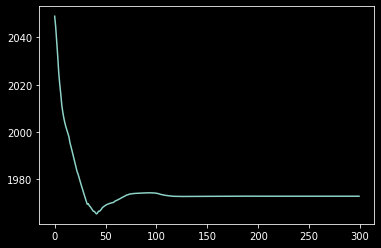

In [96]:
plt.plot(predict)